# Imports

In [1]:
import torch
import torch.nn as nn
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

# Verifying directory structure

In [2]:
data_dir = '../data/cifar10/'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [4]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

In [5]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [6]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# CNN architecture

In [7]:
class Cifar10CnnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            # Conv-1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(0.25),
            
            # Conv-2
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.AvgPool2d(2, 2), # output: 64 x 16 x 16
            
            # Conv-3
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(0.25),

            # Conv-4
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AvgPool2d(2, 2), # output: 128 x 8 x 8

            # Conv-5
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(0.25),            
            
            # Conv-6
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),           
            nn.ReLU(),
            nn.AvgPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 32),
            nn.Dropout(0.25),            
            nn.ReLU(),
            nn.Linear(32, 10))
        
    def forward(self, xb):
        return self.network(xb)

# Loading saved model

In [8]:
saved_model = Cifar10CnnModel()
saved_model.load_state_dict(torch.load('../saved_model/cifar10-cnn_with_bn_and_avg_pool.pth', map_location='cpu'))
saved_model.eval()

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.25, inplace=False)
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (16): Conv2d(128, 256, kernel_size

# Making input image fit for predicition

In [9]:
resized_img = img[None,:,:,:]

# Checking shape of the input image

In [10]:
resized_img.shape

torch.Size([1, 3, 32, 32])

# Starting the process of saving input and output of each layer

In [11]:
outputs = {}
inputs = {}

# Register a hook for each layer in the model
def get_feature_extractor_input_output_from(layer):
    # print(layer)
    def hook(module, input, output):
        module_str = str(module)
        
        if module_str[0] == 'C':
            outputs["Conv_layer_" + str(layer)] = output
            inputs["Conv_layer_" + str(layer)] = input
            
        elif module_str[0] == 'B':
            outputs["Batch_normalization_layer_" + str(layer)] = output
            inputs["Batch_normalization_layer_" + str(layer)] = input

        elif module_str[0] == 'A':
            outputs["Avg_pool_layer_" + str(layer)] = output
            inputs["Avg_pool_layer_" + str(layer)] = input
        
        elif module_str[0] == 'R':
            outputs["ReLU_layer_" + str(layer)] = output
            inputs["ReLU_layer_" + str(layer)] = input
        
        elif module_str[0] == 'F':
            outputs["Flatten_layer_" + str(layer)] = output
            inputs["Flatten_layer_" + str(layer)] = input
        
        elif module_str[0] == 'L':
            outputs["Linear_layer_" + str(layer)] = output
            inputs["Linear_layer_" + str(layer)] = input
        
    return hook        
        
for name, module in saved_model.named_modules():
    if len(name[8:]) != 0:
        # print(name[8:])
        module.register_forward_hook(get_feature_extractor_input_output_from(int(name[8:])+1))

# Perform inference on an input image
saved_model(resized_img)

tensor([[ 0.9477, -3.4433,  1.1289,  1.3220,  0.2265, -1.2243, -1.1461, -4.3077,
          1.8282, -4.6909]], grad_fn=<AddmmBackward0>)

# Verifying whether everything is working as expected

In [12]:
inputs

{'Conv_layer_1': (tensor([[[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
            [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
            [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
            ...,
            [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
            [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
            [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],
  
           [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
            [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
            [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
            ...,
            [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
            [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
            [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],
  
           [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
            [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961,

In [13]:
outputs

{'Conv_layer_1': tensor([[[[ 0.5851,  0.3733,  0.3788,  ...,  0.3677,  0.3653, -0.2304],
           [ 0.1410, -0.1351, -0.1343,  ..., -0.1547, -0.1523, -0.8325],
           [ 0.1416, -0.1373, -0.1333,  ..., -0.1617, -0.1601, -0.8498],
           ...,
           [ 0.1244, -0.1602, -0.1428,  ..., -0.2057, -0.2135, -1.0365],
           [ 0.1170, -0.1709, -0.1618,  ..., -0.2052, -0.2130, -1.0311],
           [-0.1076, -0.1818, -0.1867,  ..., -0.2121, -0.2126, -0.7859]],
 
          [[ 0.5126,  0.1061,  0.1094,  ...,  0.1016,  0.1010, -0.1013],
           [ 0.4027,  0.0474,  0.0501,  ...,  0.0411,  0.0417, -0.1705],
           [ 0.4089,  0.0481,  0.0515,  ...,  0.0458,  0.0439, -0.1755],
           ...,
           [ 0.4277,  0.0369,  0.0182,  ...,  0.0567,  0.0527, -0.2103],
           [ 0.4272,  0.0522,  0.0473,  ...,  0.0585,  0.0520, -0.2069],
           [ 0.2095, -0.0554, -0.0553,  ..., -0.0590, -0.0669, -0.3870]],
 
          [[-0.1511, -0.1305, -0.1311,  ..., -0.1347, -0.1332, -0.2571

# Helper functions

In [14]:
def create_if_not_exists(base_path):
    try:
        os.makedirs(base_path)
    except FileExistsError:
        pass

def extract_layer_number_from(param_name):
    return param_name.split('.')[1]


def extract_param_type_from(param_name):
    return param_name.split('.')[2]


def write_tensor_to_file(tensor, file_path):
    text_file = open(file_path, "w+")
    tensor.data.numpy().tofile(text_file, sep=" ", format="%.8f")
    text_file.close()


def print_parameters(model):
    for name, param in model.named_parameters():
        if 'feature_extractor' in name:
            print(f"Feature_extractor Layer {extract_layer_number_from(name)} {extract_param_type_from(name)}")
        else:
            print(f" Classifier Layer {extract_layer_number_from(name)} {extract_param_type_from(name)}")
        print(f"Shape: {list(param.size())}")
        print(param.data)
        print("---------------------------------------------------------------------------")


def write_parameters_to_file(model, path):
    create_if_not_exists(path)
    for name, param in model.named_parameters():
        filename = path + "P0-" + name + ".txt"
        write_tensor_to_file(param, filename)


class bcolors:
    HEADER = '\033[95m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'

def print_intermediate_layers_for(execution):
    for key, val in execution.items():
        print("-------------------------")
        print(key)
        print("-------------------------")
        print(val)

def print_intermediate_layers_for_all(executions):
    print("Total executions " + str(len(executions)))
    for i in range(len(executions)):
        print("\n\n\nExecution " + str(i))
        print_intermediate_layers_for(executions[i])

def write_intermediate_layers_output_for(execution, base_path):
    create_if_not_exists(base_path)

    for key, val in execution.items():
        file_path = base_path + "P0-" + key + ".output.txt"
        write_tensor_to_file(val, file_path)

def write_intermediate_layers_output_for_all(executions):
    for i in range(len(executions)):
        base_path = "PrunedResnetData/Outputs/Execution_" + str(i) + "/"
        create_if_not_exists(base_path)
        write_intermediate_layers_output_for(executions[i], base_path)

def write_intermediate_layers_input_for(execution, base_path):
    create_if_not_exists(base_path)

    for key, val in execution.items():
        file_path = base_path + "P0-" + key + ".input.txt"
        write_tensor_to_file(val[0], file_path)

def write_intermediate_layers_input_for_all(executions):
    for i in range(len(executions)):
        base_path = "PrunedResnetData/Inputs/Execution_" + str(i) + "/"
        create_if_not_exists(base_path)
        write_intermediate_layers_input_for(executions[i], base_path)

def has_elements_bigger_than(items, max_value):
    layers =  list(items)
    last_layer_value = layers[-1][1]
    out_of_range_elements = last_layer_value[last_layer_value > max_value]
    return out_of_range_elements.size(dim=0) > 0

def has_elements_smaller_than(items, min_value):
    print(len(items))
    layers =  list(items)
    last_layer_value = layers[-1][1]
    out_of_range_elements = last_layer_value[last_layer_value < min_value]
    return out_of_range_elements.size(dim=0) < 0

def verify_elements_are_in_range(execution, max_value, min_value):
    if has_elements_bigger_than(execution.items(), max_value) and has_elements_smaller_than(execution.items(), min_value):
        print(bcolors.WARNING + "Warning: There are some elements out of range" + bcolors.ENDC)
    else:
        print(bcolors.OKGREEN + "All elements are in the desired range" + bcolors.ENDC)

def verify_all_executions_last_layer_output(max_value, min_value):

    for i in range(len(executions["outputs"])):
        current_execution = executions["outputs"][i]
        execution_name = f"Execution {str(i)}"
        print("-------------------------------------------------------------")
        print(execution_name)
        verify_elements_are_in_range(current_execution, max_value, min_value)

# Performing inference on 1 image and also displaying it

Label:  airplane (0)


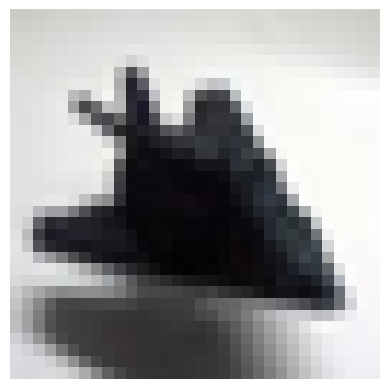

In [15]:
ROW_IMG = 1
N_ROWS = 1

fig = plt.figure()

executions = {}
executions["inputs"] = []
executions["outputs"] = []

for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(img.permute(1,2,0))

    with torch.no_grad():
        saved_model.eval()
        probs = saved_model(img.unsqueeze(0))

    executions["inputs"].append(inputs)
    executions["outputs"].append(outputs)
    
    print('Label: ', dataset.classes[label], "("+str(label)+")")

# Verifying whether everything is working as expected

In [16]:
executions["outputs"]

[{'Conv_layer_1': tensor([[[[ 0.5851,  0.3733,  0.3788,  ...,  0.3677,  0.3653, -0.2304],
            [ 0.1410, -0.1351, -0.1343,  ..., -0.1547, -0.1523, -0.8325],
            [ 0.1416, -0.1373, -0.1333,  ..., -0.1617, -0.1601, -0.8498],
            ...,
            [ 0.1244, -0.1602, -0.1428,  ..., -0.2057, -0.2135, -1.0365],
            [ 0.1170, -0.1709, -0.1618,  ..., -0.2052, -0.2130, -1.0311],
            [-0.1076, -0.1818, -0.1867,  ..., -0.2121, -0.2126, -0.7859]],
  
           [[ 0.5126,  0.1061,  0.1094,  ...,  0.1016,  0.1010, -0.1013],
            [ 0.4027,  0.0474,  0.0501,  ...,  0.0411,  0.0417, -0.1705],
            [ 0.4089,  0.0481,  0.0515,  ...,  0.0458,  0.0439, -0.1755],
            ...,
            [ 0.4277,  0.0369,  0.0182,  ...,  0.0567,  0.0527, -0.2103],
            [ 0.4272,  0.0522,  0.0473,  ...,  0.0585,  0.0520, -0.2069],
            [ 0.2095, -0.0554, -0.0553,  ..., -0.0590, -0.0669, -0.3870]],
  
           [[-0.1511, -0.1305, -0.1311,  ..., -0.1347,

In [17]:
executions["inputs"]

[{'Conv_layer_1': (tensor([[[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
             [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
             [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
             ...,
             [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
             [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
             [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],
   
            [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
             [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
             [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
             ...,
             [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
             [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
             [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],
   
            [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
             [0.7961, 0.7961, 0.8000,  ..

# Saving input and output in text format

In [18]:
print("=============================================== Inputs ===============================================")
print_intermediate_layers_for_all(executions["inputs"])
print("=============================================== Outputs ===============================================")
print_intermediate_layers_for_all(executions["outputs"])
verify_all_executions_last_layer_output(max_value = 14, min_value= -14)
write_intermediate_layers_input_for_all(executions["inputs"])
write_intermediate_layers_output_for_all(executions["outputs"])


=============================================== Inputs ===============================================
Total executions 1



Execution 0
-------------------------
Conv_layer_1
-------------------------
(tensor([[[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
          [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
          [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
          ...,
          [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
          [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
          [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

         [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
          [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
          [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
          ...,
          [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
          [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
          [0.8471, 0.8431, 0.8471,  ...